# Parte 2: Reglas de Asociación
## Análisis del Dataset Movies_2026 usando Algoritmo Apriori

**Objetivo:** Descubrir patrones y reglas de asociación interesantes en el dataset de películas usando el algoritmo Apriori.

**Contenido:**
1. Carga de datos y preparación
2. Discretización de variables numéricas
3. Preparación de datos para Apriori (formato transaccional)
4. Generación de reglas con diferentes niveles de soporte y confianza
5. Análisis y eliminación de variables muy frecuentes
6. Visualización e interpretación de reglas interesantes

---

## 1. Importación de Librerías y Carga de Datos

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    plt.style.use('default')
    
sns.set_palette("husl")
%matplotlib inline

print("✓ Librerías importadas exitosamente")

✓ Librerías importadas exitosamente


In [4]:
# Cargar el dataset
# Usar encoding='latin-1' para manejar caracteres especiales
try:
    df = pd.read_csv('movies_2026.csv', encoding='utf-8')
except UnicodeDecodeError:
    # Si utf-8 falla, intentar con latin-1 (común en archivos con caracteres especiales)
    df = pd.read_csv('movies_2026.csv', encoding='latin-1')
    print("⚠ Archivo cargado con encoding latin-1\n")

print("="*80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*80)
print(f"Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"\nPrimeras filas:")
display(df.head())

print(f"\nInformación de columnas:")
print(df.info())

⚠ Archivo cargado con encoding latin-1

INFORMACIÓN GENERAL DEL DATASET
Dimensiones: 19883 filas × 28 columnas

Primeras filas:


,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
0,1627085,0.0,Drama|Crime,NaN,NaN,NaN,NaN,0.0,95,False,...,2026-02-01,0.0,0,2,0,0,8,2.0,5.0,2026.0
1,1626914,0.0,Animation,NaN,NaN,NaN,NaN,0.0,3,False,...,2026-02-01,0.0,0,1,0,0,4,0.0,0.0,2026.0
2,1626898,0.0,Animation,NaN,NaN,NaN,NaN,0.0,2,False,...,2026-02-01,0.0,0,1,0,0,3,0.0,0.0,2026.0
3,1626808,0.0,Thriller|Mystery|Documentary,NaN,NaN,NaN,NaN,0.0,5,False,...,2026-02-01,0.0,0,3,0,0,7,0.0,0.0,2026.0
4,1626678,0.0,Animation,NaN,NaN,NaN,NaN,0.0,12,False,...,2026-02-01,0.0,0,1,0,0,3,0.0,0.0,2026.0



Información de columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19883 entries, 0 to 19882
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         19883 non-null  int64  
 1   budget                     19883 non-null  float64
 2   genres                     17918 non-null  object 
 3   homePage                   5607 non-null   object 
 4   productionCompany          14223 non-null  object 
 5   productionCompanyCountry   11473 non-null  object 
 6   productionCountry          16009 non-null  object 
 7   revenue                    19883 non-null  float64
 8   runtime                    19883 non-null  int64  
 9   video                      19397 non-null  object 
 10  director                   18907 non-null  object 
 11  actors                     17282 non-null  object 
 12  actorsPopularity           17275 non-null  object 
 13  actorsCharacter     

## 2. Discretización de Variables Numéricas

Para el algoritmo Apriori, necesitamos convertir las variables numéricas en categóricas. Discretizaremos las variables principales en rangos significativos:

- **Budget (Presupuesto)**: Cero, Bajo, Medio, Alto
- **Revenue (Ingresos)**: Cero, Bajo, Medio, Alto
- **Runtime (Duración)**: Corta, Media, Larga
- **Popularity (Popularidad)**: Muy Baja, Baja, Media, Alta
- **VoteAvg (Calificación)**: Sin calificación, Baja, Media, Alta
- **VoteCount (Número de votos)**: Sin votos, Pocos, Moderados, Muchos

In [5]:
# Crear dataset para reglas de asociación
df_association = df.copy()
df_discretized = pd.DataFrame()

print("="*80)
print("DISCRETIZACIÓN DE VARIABLES NUMÉRICAS")
print("="*80)

# 1. PRESUPUESTO
print("\n1. PRESUPUESTO:")
df_discretized['Presupuesto_Cero'] = (df_association['budget'] == 0).astype(int)
df_discretized['Presupuesto_Bajo'] = ((df_association['budget'] > 0) & 
                                       (df_association['budget'] <= 1000000)).astype(int)
df_discretized['Presupuesto_Medio'] = ((df_association['budget'] > 1000000) & 
                                        (df_association['budget'] <= 50000000)).astype(int)
df_discretized['Presupuesto_Alto'] = (df_association['budget'] > 50000000).astype(int)

print(f"  Cero: {df_discretized['Presupuesto_Cero'].sum()} películas ({df_discretized['Presupuesto_Cero'].mean()*100:.1f}%)")
print(f"  Bajo (>0-1M): {df_discretized['Presupuesto_Bajo'].sum()} películas ({df_discretized['Presupuesto_Bajo'].mean()*100:.1f}%)")
print(f"  Medio (1M-50M): {df_discretized['Presupuesto_Medio'].sum()} películas ({df_discretized['Presupuesto_Medio'].mean()*100:.1f}%)")
print(f"  Alto (>50M): {df_discretized['Presupuesto_Alto'].sum()} películas ({df_discretized['Presupuesto_Alto'].mean()*100:.1f}%)")

# 2. INGRESOS
print("\n2. INGRESOS:")
df_discretized['Ingresos_Cero'] = (df_association['revenue'] == 0).astype(int)
df_discretized['Ingresos_Bajo'] = ((df_association['revenue'] > 0) & 
                                    (df_association['revenue'] <= 1000000)).astype(int)
df_discretized['Ingresos_Medio'] = ((df_association['revenue'] > 1000000) & 
                                     (df_association['revenue'] <= 100000000)).astype(int)
df_discretized['Ingresos_Alto'] = (df_association['revenue'] > 100000000).astype(int)

print(f"  Cero: {df_discretized['Ingresos_Cero'].sum()} películas ({df_discretized['Ingresos_Cero'].mean()*100:.1f}%)")
print(f"  Bajo (>0-1M): {df_discretized['Ingresos_Bajo'].sum()} películas ({df_discretized['Ingresos_Bajo'].mean()*100:.1f}%)")
print(f"  Medio (1M-100M): {df_discretized['Ingresos_Medio'].sum()} películas ({df_discretized['Ingresos_Medio'].mean()*100:.1f}%)")
print(f"  Alto (>100M): {df_discretized['Ingresos_Alto'].sum()} películas ({df_discretized['Ingresos_Alto'].mean()*100:.1f}%)")

# 3. DURACIÓN
print("\n3. DURACIÓN:")
df_discretized['Duración_Corta'] = (df_association['runtime'] <= 30).astype(int)
df_discretized['Duración_Media'] = ((df_association['runtime'] > 30) & 
                                     (df_association['runtime'] <= 120)).astype(int)
df_discretized['Duración_Larga'] = (df_association['runtime'] > 120).astype(int)

print(f"  Corta (≤30 min): {df_discretized['Duración_Corta'].sum()} películas ({df_discretized['Duración_Corta'].mean()*100:.1f}%)")
print(f"  Media (30-120 min): {df_discretized['Duración_Media'].sum()} películas ({df_discretized['Duración_Media'].mean()*100:.1f}%)")
print(f"  Larga (>120 min): {df_discretized['Duración_Larga'].sum()} películas ({df_discretized['Duración_Larga'].mean()*100:.1f}%)")

# 4. POPULARIDAD
print("\n4. POPULARIDAD:")
df_discretized['Popularidad_Muy_Baja'] = (df_association['popularity'] <= 0.1).astype(int)
df_discretized['Popularidad_Baja'] = ((df_association['popularity'] > 0.1) & 
                                       (df_association['popularity'] <= 1)).astype(int)
df_discretized['Popularidad_Media'] = ((df_association['popularity'] > 1) & 
                                        (df_association['popularity'] <= 10)).astype(int)
df_discretized['Popularidad_Alta'] = (df_association['popularity'] > 10).astype(int)

print(f"  Muy Baja (≤0.1): {df_discretized['Popularidad_Muy_Baja'].sum()} películas ({df_discretized['Popularidad_Muy_Baja'].mean()*100:.1f}%)")
print(f"  Baja (0.1-1): {df_discretized['Popularidad_Baja'].sum()} películas ({df_discretized['Popularidad_Baja'].mean()*100:.1f}%)")
print(f"  Media (1-10): {df_discretized['Popularidad_Media'].sum()} películas ({df_discretized['Popularidad_Media'].mean()*100:.1f}%)")
print(f"  Alta (>10): {df_discretized['Popularidad_Alta'].sum()} películas ({df_discretized['Popularidad_Alta'].mean()*100:.1f}%)")

# 5. CALIFICACIÓN
print("\n5. CALIFICACIÓN:")
df_discretized['Sin_Calificación'] = (df_association['voteAvg'] == 0).astype(int)
df_discretized['Calificación_Baja'] = ((df_association['voteAvg'] > 0) & 
                                        (df_association['voteAvg'] <= 5)).astype(int)
df_discretized['Calificación_Media'] = ((df_association['voteAvg'] > 5) & 
                                         (df_association['voteAvg'] <= 7)).astype(int)
df_discretized['Calificación_Alta'] = (df_association['voteAvg'] > 7).astype(int)

print(f"  Sin calificación: {df_discretized['Sin_Calificación'].sum()} películas ({df_discretized['Sin_Calificación'].mean()*100:.1f}%)")
print(f"  Baja (>0-5): {df_discretized['Calificación_Baja'].sum()} películas ({df_discretized['Calificación_Baja'].mean()*100:.1f}%)")
print(f"  Media (5-7): {df_discretized['Calificación_Media'].sum()} películas ({df_discretized['Calificación_Media'].mean()*100:.1f}%)")
print(f"  Alta (>7): {df_discretized['Calificación_Alta'].sum()} películas ({df_discretized['Calificación_Alta'].mean()*100:.1f}%)")

# 6. NÚMERO DE VOTOS
print("\n6. NÚMERO DE VOTOS:")
df_discretized['Sin_Votos'] = (df_association['voteCount'] == 0).astype(int)
df_discretized['Pocos_Votos'] = ((df_association['voteCount'] > 0) & 
                                  (df_association['voteCount'] <= 100)).astype(int)
df_discretized['Votos_Moderados'] = ((df_association['voteCount'] > 100) & 
                                      (df_association['voteCount'] <= 1000)).astype(int)
df_discretized['Muchos_Votos'] = (df_association['voteCount'] > 1000).astype(int)

print(f"  Sin votos: {df_discretized['Sin_Votos'].sum()} películas ({df_discretized['Sin_Votos'].mean()*100:.1f}%)")
print(f"  Pocos (1-100): {df_discretized['Pocos_Votos'].sum()} películas ({df_discretized['Pocos_Votos'].mean()*100:.1f}%)")
print(f"  Moderados (100-1000): {df_discretized['Votos_Moderados'].sum()} películas ({df_discretized['Votos_Moderados'].mean()*100:.1f}%)")
print(f"  Muchos (>1000): {df_discretized['Muchos_Votos'].sum()} películas ({df_discretized['Muchos_Votos'].mean()*100:.1f}%)")

print(f"\n{'='*80}")
print(f"Total de variables discretizadas numéricas: {df_discretized.shape[1]}")

DISCRETIZACIÓN DE VARIABLES NUMÉRICAS

1. PRESUPUESTO:
  Cero: 13281 películas (66.8%)
  Bajo (>0-1M): 1689 películas (8.5%)
  Medio (1M-50M): 3787 películas (19.0%)
  Alto (>50M): 1126 películas (5.7%)

2. INGRESOS:
  Cero: 14485 películas (72.9%)
  Bajo (>0-1M): 591 películas (3.0%)
  Medio (1M-100M): 3279 películas (16.5%)
  Alto (>100M): 1528 películas (7.7%)

3. DURACIÓN:
  Corta (≤30 min): 7298 películas (36.7%)
  Media (30-120 min): 10585 películas (53.2%)
  Larga (>120 min): 2000 películas (10.1%)

4. POPULARIDAD:
  Muy Baja (≤0.1): 6640 películas (33.4%)
  Baja (0.1-1): 2583 películas (13.0%)
  Media (1-10): 1063 películas (5.3%)
  Alta (>10): 9597 películas (48.3%)

5. CALIFICACIÓN:
  Sin calificación: 8326 películas (41.9%)
  Baja (>0-5): 1005 películas (5.1%)
  Media (5-7): 6799 películas (34.2%)
  Alta (>7): 3753 películas (18.9%)

6. NÚMERO DE VOTOS:
  Sin votos: 8302 películas (41.8%)
  Pocos (1-100): 3709 películas (18.7%)
  Moderados (100-1000): 4777 películas (24.0%)


## 3. Procesamiento de Variables Categóricas

Ahora procesaremos las variables categóricas importantes:
- **Géneros**: One-hot encoding de los géneros más frecuentes
- **Idioma**: One-hot encoding de los idiomas más comunes
- **Año de lanzamiento**: Agrupar por décadas o períodos

In [6]:
print("="*80)
print("PROCESAMIENTO DE VARIABLES CATEGÓRICAS")
print("="*80)

# GÉNEROS (one-hot encoding de los más frecuentes)
print("\n1. GÉNEROS:")
all_genres = []
for genres in df_association['genres'].dropna():
    if isinstance(genres, str) and genres:
        all_genres.extend(genres.split('|'))

genre_counts = pd.Series(all_genres).value_counts()
print(f"Total de géneros únicos: {len(genre_counts)}")
print(f"\nGéneros más frecuentes:")
print(genre_counts.head(15))

# Seleccionar géneros que aparecen en al menos 2% de películas
min_genre_count = len(df_association) * 0.02
popular_genres = genre_counts[genre_counts >= min_genre_count].index.tolist()
print(f"\nGéneros seleccionados (frecuencia >2%): {len(popular_genres)}")
print(f"Géneros: {', '.join(popular_genres)}")

for genre in popular_genres:
    df_discretized[f'Género_{genre}'] = df_association['genres'].apply(
        lambda x: 1 if isinstance(x, str) and genre in x.split('|') else 0
    )

# IDIOMAS (one-hot encoding de los más frecuentes)
print(f"\n{'='*80}")
print("2. IDIOMAS:")
lang_counts = df_association['originalLanguage'].value_counts()
print(f"Total de idiomas únicos: {len(lang_counts)}")
print(f"\nIdiomas más frecuentes:")
print(lang_counts.head(15))

# Seleccionar idiomas que aparecen en al menos 1% de películas
min_lang_count = len(df_association) * 0.01
popular_langs = lang_counts[lang_counts >= min_lang_count].index.tolist()
print(f"\nIdiomas seleccionados (frecuencia >1%): {len(popular_langs)}")
print(f"Idiomas: {', '.join(popular_langs)}")

for lang in popular_langs:
    df_discretized[f'Idioma_{lang}'] = (df_association['originalLanguage'] == lang).astype(int)

# CANTIDAD DE GÉNEROS
print(f"\n{'='*80}")
print("3. CANTIDAD DE GÉNEROS:")
df_discretized['UnGénero'] = (df_association['genresAmount'] == 1).astype(int)
df_discretized['VariosGéneros'] = (df_association['genresAmount'] >= 2).astype(int)
print(f"  Un género: {df_discretized['UnGénero'].sum()} películas ({df_discretized['UnGénero'].mean()*100:.1f}%)")
print(f"  Varios géneros: {df_discretized['VariosGéneros'].sum()} películas ({df_discretized['VariosGéneros'].mean()*100:.1f}%)")

# CANTIDAD DE ACTORES
print(f"\n{'='*80}")
print("4. CANTIDAD DE ACTORES:")
df_discretized['PocoElenco'] = (df_association['actorsAmount'] <= 3).astype(int)
df_discretized['ElencoNormal'] = ((df_association['actorsAmount'] > 3) & 
                                   (df_association['actorsAmount'] <= 8)).astype(int)
df_discretized['GranElenco'] = (df_association['actorsAmount'] > 8).astype(int)
print(f"  Poco elenco (≤3): {df_discretized['PocoElenco'].sum()} películas ({df_discretized['PocoElenco'].mean()*100:.1f}%)")
print(f"  Elenco normal (3-8): {df_discretized['ElencoNormal'].sum()} películas ({df_discretized['ElencoNormal'].mean()*100:.1f}%)")
print(f"  Gran elenco (>8): {df_discretized['GranElenco'].sum()} películas ({df_discretized['GranElenco'].mean()*100:.1f}%)")

print(f"\n{'='*80}")
print(f"DATASET FINAL PARA REGLAS DE ASOCIACIÓN")
print(f"{'='*80}")
print(f"Dimensiones: {df_discretized.shape}")
print(f"Total de atributos binarios: {df_discretized.shape[1]}")

PROCESAMIENTO DE VARIABLES CATEGÓRICAS

1. GÉNEROS:
Total de géneros únicos: 19

Géneros más frecuentes:
Drama              6561
Comedy             4796
Thriller           3384
Action             3041
Documentary        2432
Horror             2404
Adventure          2005
Romance            2001
Animation          1980
Family             1741
Fantasy            1641
Crime              1559
Science Fiction    1556
Mystery            1228
Music               789
Name: count, dtype: int64

Géneros seleccionados (frecuencia >2%): 17
Géneros: Drama, Comedy, Thriller, Action, Documentary, Horror, Adventure, Romance, Animation, Family, Fantasy, Crime, Science Fiction, Mystery, Music, History, TV Movie

2. IDIOMAS:
Total de idiomas únicos: 94

Idiomas más frecuentes:
originalLanguage
en    11961
es     1238
fr     1094
ja      868
pt      628
de      461
zh      365
ko      336
it      302
nl      192
ru      190
id      173
sv      133
tl      110
ar      106
Name: count, dtype: int64

Idioma

## 4. Análisis de Frecuencias de Items

Antes de generar reglas, analizaremos qué tan frecuentes son los diferentes items en el dataset.

FRECUENCIAS DE ITEMS

Top 30 items más frecuentes:
Ingresos_Cero           0.728512
Presupuesto_Cero        0.667958
Idioma_en               0.601569
VariosGéneros           0.582407
Duración_Media          0.532364
GranElenco              0.523965
Popularidad_Alta        0.482674
Sin_Calificación        0.418750
Sin_Votos               0.417543
Duración_Corta          0.367047
Calificación_Media      0.341950
Popularidad_Muy_Baja    0.333954
Género_Drama            0.329980
UnGénero                0.320525
PocoElenco              0.294221
Género_Comedy           0.241211
Votos_Moderados         0.240255
Presupuesto_Medio       0.190464
Calificación_Alta       0.188754
Pocos_Votos             0.186541
ElencoNormal            0.181814
Género_Thriller         0.170145
Ingresos_Medio          0.164915
Muchos_Votos            0.155661
Género_Action           0.152945
Popularidad_Baja        0.129910
Género_Documentary      0.122316
Género_Horror           0.120907
Género_Adventure        0

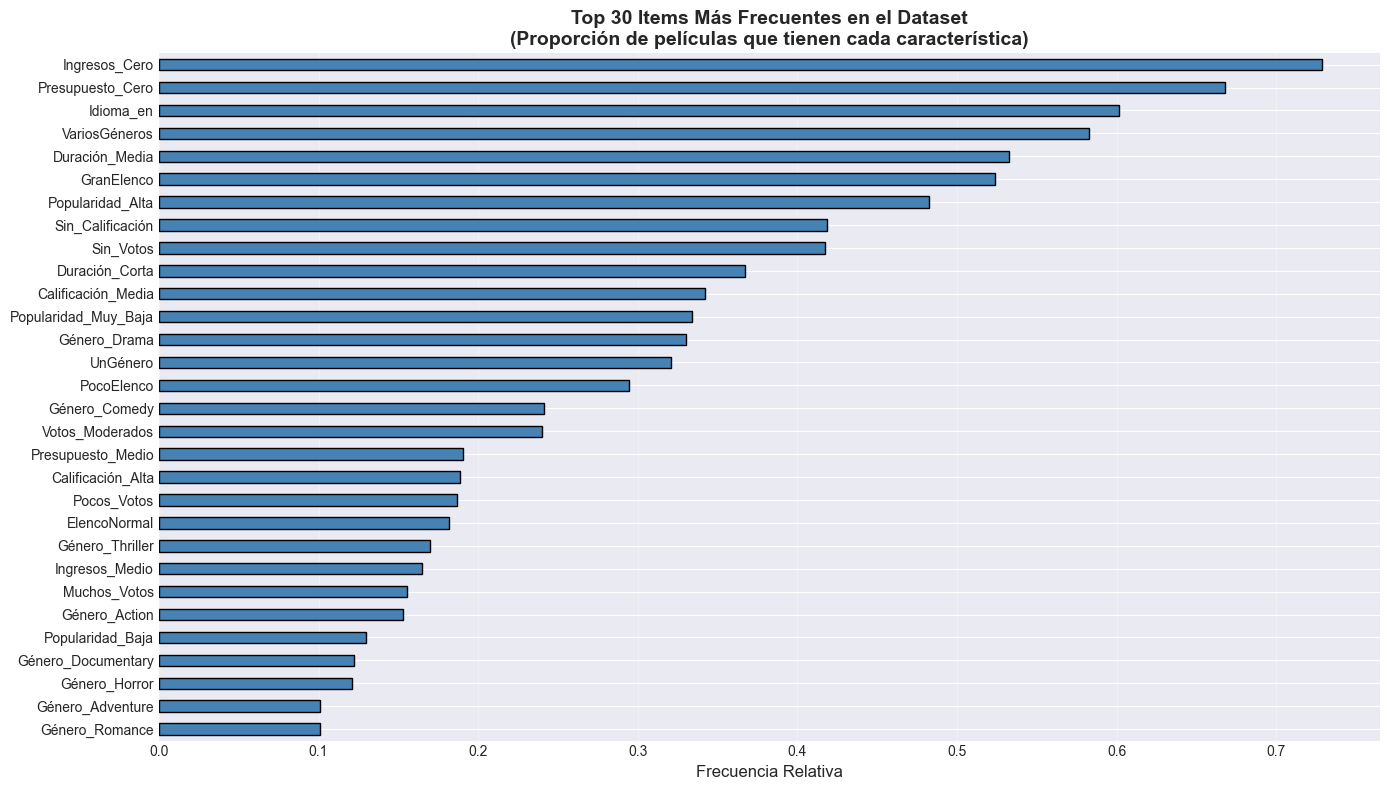


Items muy frecuentes (>70%): 1
Ingresos_Cero    0.728512
dtype: float64

Items muy raros (<1%): 0


In [7]:
# Análisis de frecuencias
print("="*80)
print("FRECUENCIAS DE ITEMS")
print("="*80)

item_frequencies = df_discretized.sum().sort_values(ascending=False) / len(df_discretized)
print(f"\nTop 30 items más frecuentes:")
print(item_frequencies.head(30))

# Visualización
plt.figure(figsize=(14, 8))
item_frequencies.head(30).plot(kind='barh', color='steelblue', edgecolor='black')
plt.xlabel('Frecuencia Relativa', fontsize=12)
plt.title('Top 30 Items Más Frecuentes en el Dataset\n(Proporción de películas que tienen cada característica)', 
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Identificar items muy frecuentes y muy raros
threshold_very_frequent = 0.7
threshold_very_rare = 0.01

very_frequent = item_frequencies[item_frequencies > threshold_very_frequent]
very_rare = item_frequencies[item_frequencies < threshold_very_rare]

print(f"\n{'='*80}")
print(f"Items muy frecuentes (>70%): {len(very_frequent)}")
if len(very_frequent) > 0:
    print(very_frequent)

print(f"\nItems muy raros (<1%): {len(very_rare)}")
if len(very_rare) > 0:
    print(f"(Se omiten {len(very_rare)} items raros)")

## 5. Generación de Reglas de Asociación con Apriori

Generaremos reglas con diferentes niveles de soporte y confianza para explorar distintos patrones en los datos.

### Configuración 1: Soporte Alto (5%), Confianza Alta (70%)

In [8]:
print("="*80)
print("CONFIGURACIÓN 1: Soporte Alto (5%), Confianza Alta (70%)")
print("="*80)
print("Objetivo: Encontrar reglas muy robustas y generales")
print()

min_support_1 = 0.05
min_confidence_1 = 0.70

print(f"Ejecutando algoritmo Apriori...")
frequent_itemsets_1 = apriori(df_discretized, min_support=min_support_1, use_colnames=True)
print(f"✓ Itemsets frecuentes encontrados: {len(frequent_itemsets_1)}")

if len(frequent_itemsets_1) > 0:
    rules_1 = association_rules(frequent_itemsets_1, metric="confidence", min_threshold=min_confidence_1)
    print(f"✓ Reglas generadas: {len(rules_1)}")
    
    if len(rules_1) > 0:
        # Filtrar por lift > 1 (asociación positiva)
        rules_1_filtered = rules_1[rules_1['lift'] > 1.0]
        print(f"✓ Reglas con lift > 1.0: {len(rules_1_filtered)}")
        
        if len(rules_1_filtered) > 0:
            print(f"\n{'='*80}")
            print("TOP 20 REGLAS POR LIFT:")
            print(f"{'='*80}")
            top_rules_1 = rules_1_filtered.nlargest(20, 'lift')[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
            display(top_rules_1)
            
            # Estadísticas
            print(f"\nEstadísticas de las reglas:")
            print(f"  Lift promedio: {rules_1_filtered['lift'].mean():.3f}")
            print(f"  Lift máximo: {rules_1_filtered['lift'].max():.3f}")
            print(f"  Confianza promedio: {rules_1_filtered['confidence'].mean():.3f}")
            print(f"  Soporte promedio: {rules_1_filtered['support'].mean():.3f}")
        else:
            print("⚠ No se encontraron reglas interesantes con estos parámetros.")
    else:
        print("⚠ No se generaron reglas con estos parámetros.")
else:
    print("⚠ No se encontraron itemsets frecuentes con este soporte.")

CONFIGURACIÓN 1: Soporte Alto (5%), Confianza Alta (70%)
Objetivo: Encontrar reglas muy robustas y generales

Ejecutando algoritmo Apriori...
✓ Itemsets frecuentes encontrados: 2809
✓ Reglas generadas: 12541
✓ Reglas con lift > 1.0: 12540

TOP 20 REGLAS POR LIFT:


,antecedents,consequents,support,confidence,lift
10738,"(Ingresos_Alto, GranElenco)","(Popularidad_Alta, VariosGéneros, Muchos_Votos...",0.063371,0.830587,6.410930
10739,"(Popularidad_Alta, Ingresos_Alto)","(Idioma_en, VariosGéneros, Muchos_Votos, GranE...",0.063371,0.826230,6.407146
10743,(Ingresos_Alto),"(GranElenco, Popularidad_Alta, VariosGéneros, ...",0.063371,0.824607,6.407060
10728,"(Popularidad_Alta, Ingresos_Alto, GranElenco)","(Idioma_en, VariosGéneros, Muchos_Votos)",0.063371,0.831683,6.406957
7109,"(Ingresos_Alto, GranElenco)","(Idioma_en, VariosGéneros, Muchos_Votos)",0.063371,0.830587,6.398510
7113,(Ingresos_Alto),"(Idioma_en, VariosGéneros, Muchos_Votos, GranE...",0.063371,0.824607,6.394566
7049,"(Popularidad_Alta, Ingresos_Alto)","(Idioma_en, VariosGéneros, Muchos_Votos)",0.063572,0.828852,6.385151
7053,(Ingresos_Alto),"(Popularidad_Alta, VariosGéneros, Muchos_Votos...",0.063572,0.827225,6.384983
2994,(Ingresos_Alto),"(Idioma_en, VariosGéneros, Muchos_Votos)",0.063572,0.827225,6.372614
10742,"(Idioma_en, Ingresos_Alto)","(Popularidad_Alta, VariosGéneros, Muchos_Votos...",0.063371,0.855978,6.245657



Estadísticas de las reglas:
  Lift promedio: 2.035
  Lift máximo: 6.411
  Confianza promedio: 0.841
  Soporte promedio: 0.092


### Configuración 2: Soporte Medio (3%), Confianza Media (60%)

In [9]:
print("="*80)
print("CONFIGURACIÓN 2: Soporte Medio (3%), Confianza Media (60%)")
print("="*80)
print("Objetivo: Balance entre generalidad y especificidad")
print()

min_support_2 = 0.03
min_confidence_2 = 0.60

print(f"Ejecutando algoritmo Apriori...")
frequent_itemsets_2 = apriori(df_discretized, min_support=min_support_2, use_colnames=True)
print(f"✓ Itemsets frecuentes encontrados: {len(frequent_itemsets_2)}")

if len(frequent_itemsets_2) > 0:
    rules_2 = association_rules(frequent_itemsets_2, metric="confidence", min_threshold=min_confidence_2)
    print(f"✓ Reglas generadas: {len(rules_2)}")
    
    if len(rules_2) > 0:
        # Filtrar por lift > 1.2 (asociación más fuerte)
        rules_2_filtered = rules_2[rules_2['lift'] > 1.2]
        print(f"✓ Reglas con lift > 1.2: {len(rules_2_filtered)}")
        
        if len(rules_2_filtered) > 0:
            print(f"\n{'='*80}")
            print("TOP 20 REGLAS POR LIFT:")
            print(f"{'='*80}")
            top_rules_2 = rules_2_filtered.nlargest(20, 'lift')[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
            display(top_rules_2)
            
            # Estadísticas
            print(f"\nEstadísticas de las reglas:")
            print(f"  Lift promedio: {rules_2_filtered['lift'].mean():.3f}")
            print(f"  Lift máximo: {rules_2_filtered['lift'].max():.3f}")
            print(f"  Confianza promedio: {rules_2_filtered['confidence'].mean():.3f}")
            print(f"  Soporte promedio: {rules_2_filtered['support'].mean():.3f}")
        else:
            print("⚠ No se encontraron reglas interesantes con estos parámetros.")
    else:
        print("⚠ No se generaron reglas con estos parámetros.")
else:
    print("⚠ No se encontraron itemsets frecuentes con este soporte.")

CONFIGURACIÓN 2: Soporte Medio (3%), Confianza Media (60%)
Objetivo: Balance entre generalidad y especificidad

Ejecutando algoritmo Apriori...
✓ Itemsets frecuentes encontrados: 6595
✓ Reglas generadas: 43339
✓ Reglas con lift > 1.2: 42082

TOP 20 REGLAS POR LIFT:


,antecedents,consequents,support,confidence,lift
39067,"(Presupuesto_Alto, Muchos_Votos)","(Ingresos_Alto, GranElenco, Popularidad_Alta, ...",0.039732,0.817805,12.107539
28745,"(Presupuesto_Alto, Muchos_Votos)","(Idioma_en, VariosGéneros, Ingresos_Alto, Gran...",0.039732,0.817805,12.098530
39058,"(Popularidad_Alta, Presupuesto_Alto, Muchos_Vo...","(Idioma_en, VariosGéneros, Ingresos_Alto, Gran...",0.039732,0.817805,12.098530
28609,"(Presupuesto_Alto, Muchos_Votos)","(Popularidad_Alta, VariosGéneros, Ingresos_Alt...",0.039833,0.819876,12.093168
39055,"(Presupuesto_Alto, Muchos_Votos, GranElenco)","(Popularidad_Alta, VariosGéneros, Ingresos_Alt...",0.039732,0.819502,12.087656
14656,"(Presupuesto_Alto, Muchos_Votos)","(Idioma_en, VariosGéneros, Ingresos_Alto)",0.039833,0.819876,12.084203
28601,"(Popularidad_Alta, Presupuesto_Alto, Muchos_Vo...","(Idioma_en, VariosGéneros, Ingresos_Alto)",0.039833,0.819876,12.084203
28737,"(Presupuesto_Alto, Muchos_Votos, GranElenco)","(Idioma_en, VariosGéneros, Ingresos_Alto)",0.039732,0.819502,12.078695
39038,"(Popularidad_Alta, Presupuesto_Alto, Muchos_Vo...","(Idioma_en, VariosGéneros, Ingresos_Alto)",0.039732,0.819502,12.078695
39062,"(Idioma_en, Presupuesto_Alto, Muchos_Votos)","(Popularidad_Alta, VariosGéneros, Ingresos_Alt...",0.039732,0.821206,11.746788



Estadísticas de las reglas:
  Lift promedio: 2.306
  Lift máximo: 12.108
  Confianza promedio: 0.796
  Soporte promedio: 0.059


### Configuración 3: Soporte Bajo (2%), Confianza Moderada (50%)

In [ ]:
print("="*80)
print("CONFIGURACIÓN 3: Soporte Bajo (2%), Confianza Moderada (50%)")
print("="*80)
print("Objetivo: Descubrir patrones más específicos y raros")
print()

min_support_3 = 0.02
min_confidence_3 = 0.50

print(f"Ejecutando algoritmo Apriori...")
frequent_itemsets_3 = apriori(df_discretized, min_support=min_support_3, use_colnames=True)
print(f"✓ Itemsets frecuentes encontrados: {len(frequent_itemsets_3)}")

if len(frequent_itemsets_3) > 0:
    rules_3 = association_rules(frequent_itemsets_3, metric="confidence", min_threshold=min_confidence_3)
    print(f"✓ Reglas generadas: {len(rules_3)}")
    
    if len(rules_3) > 0:
        # Filtrar por lift > 1.5 (asociación fuerte)
        rules_3_filtered = rules_3[rules_3['lift'] > 1.5]
        print(f"✓ Reglas con lift > 1.5: {len(rules_3_filtered)}")
        
        if len(rules_3_filtered) > 0:
            print(f"\n{'='*80}")
            print("TOP 25 REGLAS POR LIFT:")
            print(f"{'='*80}")
            top_rules_3 = rules_3_filtered.nlargest(25, 'lift')[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
            display(top_rules_3)
            
            print(f"\n{'='*80}")
            print("TOP 15 REGLAS POR CONFIANZA:")
            print(f"{'='*80}")
            top_conf_3 = rules_3_filtered.nlargest(15, 'confidence')[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
            display(top_conf_3)
            
            # Estadísticas
            print(f"\nEstadísticas de las reglas:")
            print(f"  Lift promedio: {rules_3_filtered['lift'].mean():.3f}")
            print(f"  Lift máximo: {rules_3_filtered['lift'].max():.3f}")
            print(f"  Confianza promedio: {rules_3_filtered['confidence'].mean():.3f}")
            print(f"  Soporte promedio: {rules_3_filtered['support'].mean():.3f}")
        else:
            print("⚠ No se encontraron reglas interesantes con estos parámetros.")
    else:
        print("⚠ No se generaron reglas con estos parámetros.")
else:
    print("⚠ No se encontraron itemsets frecuentes con este soporte.")

## 6. Eliminación de Variables Muy Frecuentes para Mejores Insights

Las variables que aparecen en la mayoría de las películas (>70%) pueden generar reglas triviales y poco informativas. Eliminaremos estas variables para obtener reglas más específicas e interesantes.

**Justificación:** Si un item aparece en el 90% de las películas, cualquier regla que lo involucre será poco útil porque no discrimina bien entre diferentes tipos de películas.

In [ ]:
# Identificar y eliminar variables muy frecuentes
print("="*80)
print("IDENTIFICACIÓN Y ELIMINACIÓN DE VARIABLES MUY FRECUENTES")
print("="*80)

threshold_very_frequent = 0.70  # 70%

very_frequent_items = item_frequencies[item_frequencies > threshold_very_frequent]
print(f"\nVariables que aparecen en más del {threshold_very_frequent*100:.0f}% de las películas:")
if len(very_frequent_items) > 0:
    for item, freq in very_frequent_items.items():
        print(f"  • {item}: {freq*100:.1f}%")
    
    print(f"\n{'='*80}")
    print(f"IMPACTO DE ELIMINAR VARIABLES FRECUENTES")
    print(f"{'='*80}")
    print(f"Variables a eliminar: {len(very_frequent_items)}")
    print(f"Variables originales: {df_discretized.shape[1]}")
    
    # Crear dataset filtrado
    df_discretized_filtered = df_discretized.drop(columns=very_frequent_items.index)
    print(f"Variables después del filtrado: {df_discretized_filtered.shape[1]}")
    print(f"Reducción: {len(very_frequent_items)} variables ({len(very_frequent_items)/df_discretized.shape[1]*100:.1f}%)")
    
    print(f"\n**Razón**: Estas variables son demasiado comunes y generan reglas triviales.")
    print(f"Al eliminarlas, podemos descubrir asociaciones más específicas e interesantes.")
else:
    df_discretized_filtered = df_discretized.copy()
    print("\n✓ No hay variables extremadamente frecuentes para eliminar.")
    print("  Todas las variables tienen frecuencia razonable (<70%).")

### 6.1 Generación de Reglas con Dataset Filtrado

In [ ]:
print("="*80)
print("REGLAS CON DATASET FILTRADO (sin variables muy frecuentes)")
print("="*80)
print("Parámetros: Soporte 2%, Confianza 50%")
print()

min_support_filtered = 0.02
min_confidence_filtered = 0.50

print(f"Ejecutando algoritmo Apriori en dataset filtrado...")
frequent_itemsets_filtered = apriori(df_discretized_filtered, 
                                     min_support=min_support_filtered, 
                                     use_colnames=True)
print(f"✓ Itemsets frecuentes encontrados: {len(frequent_itemsets_filtered)}")

if len(frequent_itemsets_filtered) > 0:
    rules_filtered = association_rules(frequent_itemsets_filtered, 
                                       metric="confidence", 
                                       min_threshold=min_confidence_filtered)
    print(f"✓ Reglas generadas: {len(rules_filtered)}")
    
    if len(rules_filtered) > 0:
        # Filtrar por lift > 1.5
        rules_filtered = rules_filtered[rules_filtered['lift'] > 1.5]
        print(f"✓ Reglas con lift > 1.5: {len(rules_filtered)}")
        
        if len(rules_filtered) > 0:
            print(f"\n{'='*80}")
            print("TOP 30 REGLAS MÁS INTERESANTES (ordenadas por lift):")
            print(f"{'='*80}")
            display(rules_filtered.nlargest(30, 'lift')[['antecedents', 'consequents', 
                                                           'support', 'confidence', 'lift']])
            
            print(f"\n{'='*80}")
            print("TOP 20 REGLAS POR CONFIANZA:")
            print(f"{'='*80}")
            display(rules_filtered.nlargest(20, 'confidence')[['antecedents', 'consequents', 
                                                                'support', 'confidence', 'lift']])
            
            # Estadísticas comparativas
            print(f"\n{'='*80}")
            print("ESTADÍSTICAS DE LAS REGLAS FILTRADAS:")
            print(f"{'='*80}")
            print(f"  Total de reglas: {len(rules_filtered)}")
            print(f"  Lift promedio: {rules_filtered['lift'].mean():.3f}")
            print(f"  Lift mediano: {rules_filtered['lift'].median():.3f}")
            print(f"  Lift máximo: {rules_filtered['lift'].max():.3f}")
            print(f"  Confianza promedio: {rules_filtered['confidence'].mean():.3f}")
            print(f"  Soporte promedio: {rules_filtered['support'].mean():.3f}")
        else:
            print("⚠ No se encontraron reglas con lift > 1.5.")
    else:
        print("⚠ No se generaron reglas con estos parámetros.")
else:
    print("⚠ No se encontraron itemsets frecuentes.")

## 7. Visualización de Reglas de Asociación

Crearemos visualizaciones para entender mejor las relaciones entre soporte, confianza y lift de las reglas encontradas.

In [ ]:
# Seleccionar el mejor conjunto de reglas para visualizar
if 'rules_filtered' in locals() and len(rules_filtered) > 0:
    best_rules = rules_filtered.copy()
    config_name = "Dataset Filtrado (sin variables muy frecuentes)"
elif 'rules_3_filtered' in locals() and len(rules_3_filtered) > 0:
    best_rules = rules_3_filtered.copy()
    config_name = "Configuración 3"
elif 'rules_2_filtered' in locals() and len(rules_2_filtered) > 0:
    best_rules = rules_2_filtered.copy()
    config_name = "Configuración 2"
elif 'rules_1_filtered' in locals() and len(rules_1_filtered) > 0:
    best_rules = rules_1_filtered.copy()
    config_name = "Configuración 1"
else:
    best_rules = None
    config_name = "Ninguno"

if best_rules is not None and len(best_rules) > 0:
    print(f"Visualizando reglas de: {config_name}")
    print(f"Total de reglas: {len(best_rules)}")
    
    # Crear figura con 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # Plot 1: Support vs Confidence coloreado por Lift
    scatter1 = axes[0].scatter(best_rules['support'], best_rules['confidence'], 
                              c=best_rules['lift'], s=best_rules['lift']*20, 
                              cmap='viridis', alpha=0.7, edgecolors='black', linewidth=0.5)
    axes[0].set_xlabel('Soporte', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Confianza', fontsize=12, fontweight='bold')
    axes[0].set_title('Soporte vs Confianza\n(Tamaño y color por Lift)', 
                      fontsize=13, fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    cbar1 = plt.colorbar(scatter1, ax=axes[0])
    cbar1.set_label('Lift', fontsize=11)
    
    # Plot 2: Lift vs Confidence coloreado por Support
    scatter2 = axes[1].scatter(best_rules['lift'], best_rules['confidence'],
                               c=best_rules['support'], s=80,
                               cmap='plasma', alpha=0.7, edgecolors='black', linewidth=0.5)
    axes[1].set_xlabel('Lift', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Confianza', fontsize=12, fontweight='bold')
    axes[1].set_title('Lift vs Confianza\n(Color por Soporte)',
                      fontsize=13, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    cbar2 = plt.colorbar(scatter2, ax=axes[1])
    cbar2.set_label('Soporte', fontsize=11)
    
    # Plot 3: Support vs Lift coloreado por Confidence
    scatter3 = axes[2].scatter(best_rules['support'], best_rules['lift'],
                               c=best_rules['confidence'], s=80,
                               cmap='coolwarm', alpha=0.7, edgecolors='black', linewidth=0.5)
    axes[2].set_xlabel('Soporte', fontsize=12, fontweight='bold')
    axes[2].set_ylabel('Lift', fontsize=12, fontweight='bold')
    axes[2].set_title('Soporte vs Lift\n(Color por Confianza)',
                      fontsize=13, fontweight='bold')
    axes[2].grid(True, alpha=0.3)
    cbar3 = plt.colorbar(scatter3, ax=axes[2])
    cbar3.set_label('Confianza', fontsize=11)
    
    plt.suptitle(f'Visualización de Reglas de Asociación - {config_name}',
                 fontsize=15, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Distribución de métricas
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    axes[0].hist(best_rules['support'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[0].set_xlabel('Soporte', fontsize=11)
    axes[0].set_ylabel('Frecuencia', fontsize=11)
    axes[0].set_title('Distribución de Soporte', fontsize=12, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
    axes[0].axvline(best_rules['support'].mean(), color='red', linestyle='--', 
                    linewidth=2, label=f'Media: {best_rules["support"].mean():.3f}')
    axes[0].legend()
    
    axes[1].hist(best_rules['confidence'], bins=30, color='coral', edgecolor='black', alpha=0.7)
    axes[1].set_xlabel('Confianza', fontsize=11)
    axes[1].set_ylabel('Frecuencia', fontsize=11)
    axes[1].set_title('Distribución de Confianza', fontsize=12, fontweight='bold')
    axes[1].grid(axis='y', alpha=0.3)
    axes[1].axvline(best_rules['confidence'].mean(), color='red', linestyle='--', 
                    linewidth=2, label=f'Media: {best_rules["confidence"].mean():.3f}')
    axes[1].legend()
    
    axes[2].hist(best_rules['lift'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[2].set_xlabel('Lift', fontsize=11)
    axes[2].set_ylabel('Frecuencia', fontsize=11)
    axes[2].set_title('Distribución de Lift', fontsize=12, fontweight='bold')
    axes[2].grid(axis='y', alpha=0.3)
    axes[2].axvline(best_rules['lift'].mean(), color='red', linestyle='--', 
                    linewidth=2, label=f'Media: {best_rules["lift"].mean():.3f}')
    axes[2].legend()
    
    plt.suptitle(f'Distribución de Métricas - {config_name}',
                 fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()
    
else:
    print("⚠ No hay reglas suficientes para visualizar.")

## 8. Análisis Detallado de Reglas Más Interesantes

Examinaremos en detalle las reglas más relevantes para extraer insights accionables.

In [ ]:
# Análisis detallado de las mejores reglas
if best_rules is not None and len(best_rules) > 0:
    print("="*80)
    print("REGLAS MÁS INTERESANTES - ANÁLISIS DETALLADO")
    print("="*80)
    
    # Seleccionar top reglas balanceando lift, confidence y support
    best_rules['score'] = (best_rules['lift'] * best_rules['confidence'] * 
                           np.sqrt(best_rules['support']))
    top_interesting = best_rules.nlargest(20, 'score')
    
    print("\n📊 Top 20 reglas más interesantes (balanceando lift, confianza y soporte):\n")
    print("="*80)
    
    for idx, (i, row) in enumerate(top_interesting.iterrows(), 1):
        antecedents_str = ', '.join(list(row['antecedents']))
        consequents_str = ', '.join(list(row['consequents']))
        
        print(f"\n{idx}. REGLA:")
        print(f"   SI {antecedents_str}")
        print(f"   ENTONCES {consequents_str}")
        print(f"   " + "-"*76)
        print(f"   📈 Soporte: {row['support']:.4f} ({row['support']*100:.2f}% de películas)")
        print(f"   📈 Confianza: {row['confidence']:.4f} ({row['confidence']*100:.2f}%)")
        print(f"   📈 Lift: {row['lift']:.4f} ({row['lift']:.2f}x más probable que aleatorio)")
        print(f"   📈 Score: {row['score']:.4f}")
        
        # Interpretación
        if row['lift'] > 3:
            print(f"   💡 **Asociación MUY FUERTE** - Estos items tienden a ocurrir juntos")
        elif row['lift'] > 2:
            print(f"   💡 **Asociación FUERTE** - Alta correlación entre items")
        else:
            print(f"   💡 **Asociación MODERADA** - Relación significativa pero no extrema")
    
    print(f"\n{'='*80}")
    print("CATEGORIZACIÓN DE REGLAS POR TIPO")
    print("="*80)
    
    # Categorizar reglas
    very_strong = best_rules[best_rules['lift'] > 3]
    strong = best_rules[(best_rules['lift'] > 2) & (best_rules['lift'] <= 3)]
    moderate = best_rules[(best_rules['lift'] > 1.5) & (best_rules['lift'] <= 2)]
    
    print(f"\nReglas con asociación MUY FUERTE (lift > 3): {len(very_strong)}")
    print(f"Reglas con asociación FUERTE (2 < lift ≤ 3): {len(strong)}")
    print(f"Reglas con asociación MODERADA (1.5 < lift ≤ 2): {len(moderate)}")
    
else:
    print("⚠ No hay reglas para analizar.")